# Assignment 4: Feature Engineering
Choosen Dataset:
[Data Science Job Posting on Glassdoor](https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor)

Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian



**Import Libraries**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from random import seed
from random import randint
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# seed random number generator
seed(1)

**Read Dataset**

In [84]:
path = "/content/Cleaned_DS_Jobs.csv"
df = pd.read_csv(path)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


One of the practices for this assignment is related to Date/Time. Becuase we don't have any column for this subject, We add 2 new columns to dataset: first one called **"Date_of_Posting"** that indicates when a job opportunity is posted, second one is **"Date_of_Acceptance"** that shows when a suitable candidate has found for the job.

In [85]:
entries_count = len(df)
df['Date_of_Posting'] = [np.random.choice(pd.date_range(datetime.datetime(2016,1,1)
                                         ,datetime.datetime(2018,12,29)))
                                          for i in range(entries_count)]

# for day of acceptance, we add 14 day - 60 days randomly to day of posting
df["Date_of_Acceptance"] = df['Date_of_Posting'].apply(lambda x: x + datetime.timedelta(days=randint(14, 60)) )

In [86]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority', 'Date_of_Posting', 'Date_of_Acceptance'],
      dtype='object')

# Ratio

Here, we will caculate the ratio of some of the features. At first we compute the ratio between max salary and avg salary:

In [87]:
df['MaxSal_per_AvgSal'] = df['max_salary'] / df['avg_salary']

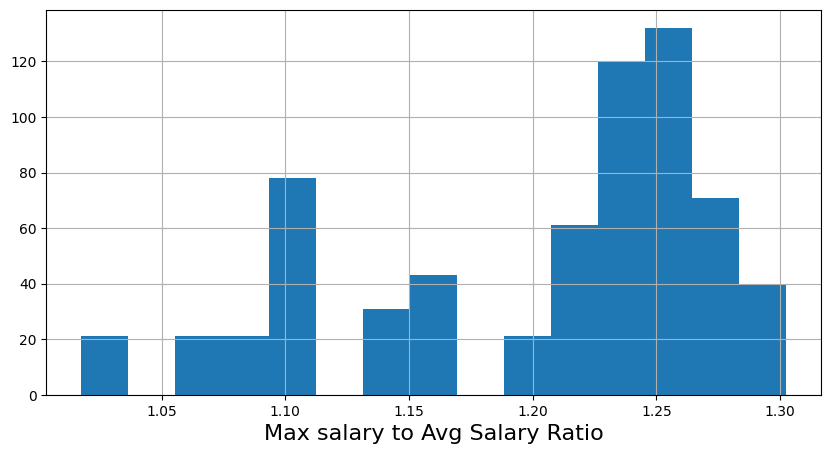

In [88]:
# Create the histogram
df['MaxSal_per_AvgSal'].hist(bins=15,figsize=(10,5))
plt.xlabel('Max salary to Avg Salary Ratio',fontsize=16)
plt.show()

Another ratio which we are calculating here is **"Rating"** per **"Company Age"** :

In [89]:
df['rating_per_age'] = df['Rating'] / df['company_age']

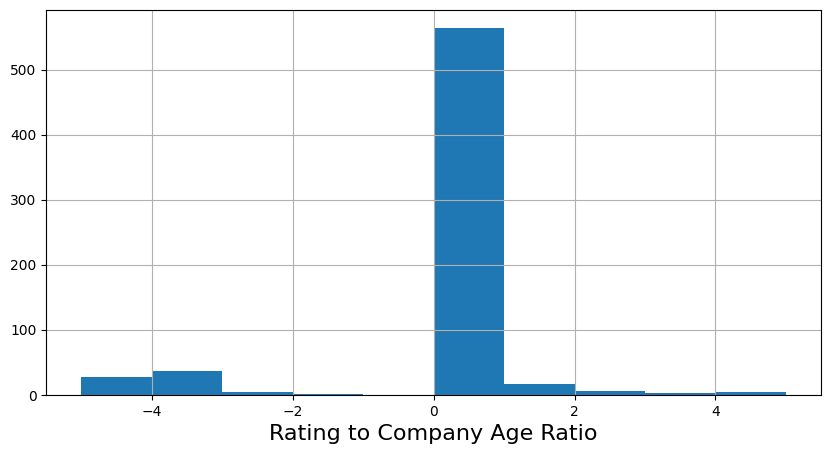

In [90]:
# Create the histogram
df['rating_per_age'].hist(bins=10,figsize=(10,5))
plt.xlabel('Rating to Company Age Ratio',fontsize=16)
plt.show()

# Binning

A suitable feature for binning is "Rating". We divide this column into intervals, for instance, we can categorize "Rating" in this way:

*   Worst (<= 1 )
*   Bad ( 1 < rate <= 2 )
*   Neutral ( 2 < rate <= 3 )
*   Good (3 < rate <= 4)
*   Excellent (4 < rate <= 5)


In [91]:
bins = [-0.01, 1.0, 2.0, 3.0, 4.0, 5.0]
labels = [1,2,3,4,5]
df['Binned_Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels)

In [92]:
df[['Rating','Binned_Rating']].tail()

,Rating,Binned_Rating
655,3.6,4
656,0.0,1
657,0.0,1
658,5.0,5
659,2.7,3


In the previous example, we manually determined bins and they were uneven. In this part, we just give number of bins and boundaries will be calculated automatically.

We will apply this spproach to **"avg_salary"**.

In [93]:
no_bins = 12
bin_step = int((df['avg_salary'].max() - df['avg_salary'].min())/no_bins)
bins = np.arange(int(df['avg_salary'].min()),int(df['avg_salary'].max()) + 1, bin_step)
labels = np.arange(1,len(bins))
df['Binned_avg_salary'] = pd.cut(df['avg_salary'], bins=bins, labels=labels)

In [94]:
df[['avg_salary','Binned_avg_salary']]

,avg_salary,Binned_avg_salary
0,154,6
1,154,6
2,154,6
3,154,6
4,154,6
...,...,...
655,136,5
656,136,5
657,136,5
658,136,5


# Combining columns

A career opportunity needs different skillsets but for now we just have them in separate columns. A new column,**"NumRequiredSkills"** is added to dataset showing how many skills a job applicant should have to be a proper candidate for a job.

In [95]:
# number of required skills
def calculate_required_skills_size(input_df):
    """ count of skills a job required
    (python,excel, hadoop, spark, aws, tableau, big_data) """

    skills = ['python','excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']
    output = 0
    for skill in skills:
        output += input_df[skill]

    return output

In [96]:
df['NumRequiredSkills'] = df.apply(calculate_required_skills_size, axis=1)

The following plot represents that approximately **%65** of positions at most need 3 skills:

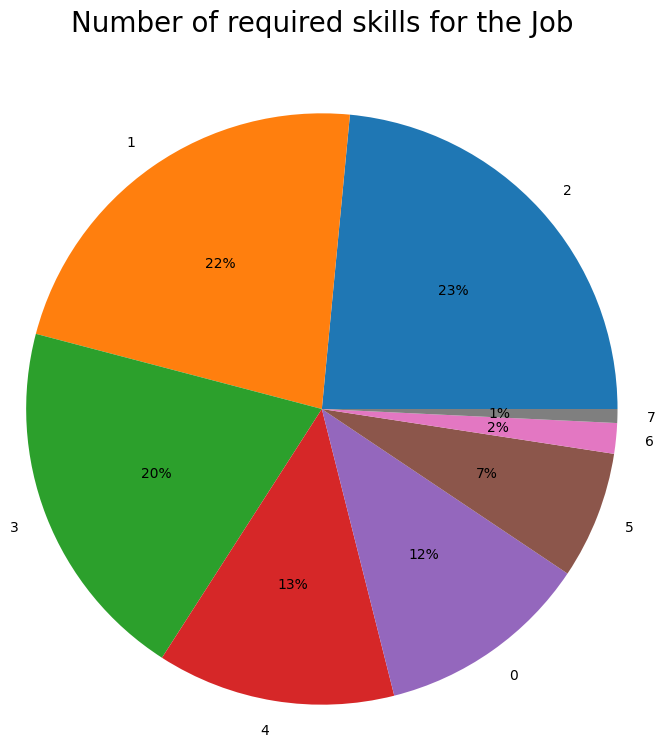

In [97]:
df['NumRequiredSkills'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Number of required skills for the Job', y=1.5,fontsize=20)
plt.show()

Sector and Industry are two fields that are related together. We combine them and introduce new feature **"Sector_and_Industry_cat"**:

In [98]:
df['Sector_and_Industry_cat'] = df[['Sector', 'Industry']].agg('_'.join, axis=1)

In [99]:
df[['Sector', 'Industry','Sector_and_Industry_cat']].head(10)

,Sector,Industry,Sector_and_Industry_cat
0,Insurance,Insurance Carriers,Insurance_Insurance Carriers
1,Business Services,Research & Development,Business Services_Research & Development
2,Business Services,Consulting,Business Services_Consulting
3,Manufacturing,Electrical & Electronic Manufacturing,Manufacturing_Electrical & Electronic Manufact...
4,Business Services,Advertising & Marketing,Business Services_Advertising & Marketing
5,Information Technology,Computer Hardware & Software,Information Technology_Computer Hardware & Sof...
6,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals_Biotech & Pharmaceut...
7,Retail,Consumer Electronics & Appliances Stores,Retail_Consumer Electronics & Appliances Stores
8,Information Technology,Computer Hardware & Software,Information Technology_Computer Hardware & Sof...
9,Information Technology,Enterprise Software & Network Solutions,Information Technology_Enterprise Software & N...


In [100]:
df['Sector_and_Industry_cat'].unique()

array(['Insurance_Insurance Carriers',
       'Business Services_Research & Development',
       'Business Services_Consulting',
       'Manufacturing_Electrical & Electronic Manufacturing',
       'Business Services_Advertising & Marketing',
       'Information Technology_Computer Hardware & Software',
       'Biotech & Pharmaceuticals_Biotech & Pharmaceuticals',
       'Retail_Consumer Electronics & Appliances Stores',
       'Information Technology_Enterprise Software & Network Solutions',
       'Information Technology_IT Services',
       'Oil, Gas, Energy & Utilities_Energy',
       'Manufacturing_Chemical Manufacturing',
       'Government_Federal Agencies',
       'Health Care_Health Care Services & Hospitals',
       'Information Technology_Internet',
       'Finance_Investment Banking & Asset Management',
       'Aerospace & Defense_Aerospace & Defense',
       'Oil, Gas, Energy & Utilities_Utilities', '-1_-1',
       'Transportation & Logistics_Express Delivery Services',
  

# Function of a column

In this section, we aim to discover that if the feature we want to predict is a function of certain column or not. For this purpose, **"avg_salary"** will be ploted based on these fields:


*   Rating
*   Min salary
*   NumRequiredSkills




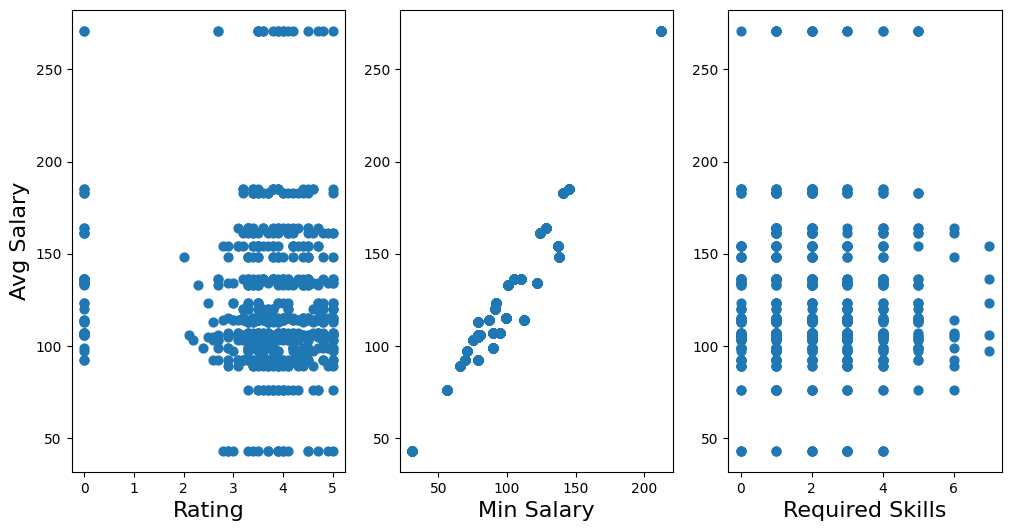

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df.plot(ax=axes[0], kind = 'scatter', x='Rating',y='avg_salary',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[1], kind = 'scatter', x='min_salary',y='avg_salary',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[2], kind = 'scatter', x='NumRequiredSkills',y='avg_salary',figsize=(12,6),stacked=True,s=40)


axes[0].set_xlabel('Rating',fontsize=16)
axes[0].set_ylabel('Avg Salary',fontsize=16)

axes[1].set_xlabel('Min Salary',fontsize=16)
axes[1].set_ylabel('',fontsize=16)

axes[2].set_xlabel('Required Skills',fontsize=16)
axes[2].set_ylabel('',fontsize=16)

plt.show()



Obviously, Min salary has a linear relation with Avg salary but about other attributes, We don't see any useful pattern between them and target feature.

In some cases features have interesting relation with target column such as power of 2, inverse or logarthmic relation. In this scenario, we can apply a function on that column and achieve a new feature that has a simpler relation to target column, mostly linear one. Our model will benefit more from the new attribute.

Unfortunately here there is no useful relation between columns so we can't do anything.

# Date/Time

We will split **"Date_of_Posting"** to year, month, day, season and day of week. Then, we will calculate how many days it took to find a desired applicant for the position.

In [102]:
# split date
df['year'] = df["Date_of_Posting"].dt.year
df['month'] = df["Date_of_Posting"].dt.month
df['day'] = df["Date_of_Posting"].dt.day
df['season'] = df["Date_of_Posting"].dt.quarter
df['day_of_week'] = df["Date_of_Posting"].dt.dayofweek

# days passed to close the opportunity
df['No_Days_until_Closed'] = ((df["Date_of_Acceptance"] - df["Date_of_Posting"]).dt.days).astype(int)

df[['Date_of_Posting','Date_of_Acceptance','year','month','day','day_of_week','season','No_Days_until_Closed']].head()

,Date_of_Posting,Date_of_Acceptance,year,month,day,day_of_week,season,No_Days_until_Closed
0,2017-12-25,2018-01-16,2017,12,25,0,4,22
1,2016-12-27,2017-02-15,2016,12,27,1,4,50
2,2017-11-02,2017-11-20,2017,11,2,3,4,18
3,2018-07-11,2018-08-10,2018,7,11,2,3,30
4,2016-09-28,2016-10-19,2016,9,28,2,3,21


# Counts

We introduce several new columns here:


*   Does this opportunity require any special skill? we will sum up skills cols and watch the result ( if sum > 0 )
*   Saprk, Hadoop and Big data skills remind us that in this position you deal with massive data. We append a column that shows if the position is related to this field.
*   In the last column, we will witness that how many big data skills a position needs.



In [103]:
df["Need_special_skill"] = (df[['python','excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']].sum(axis=1) > 0).astype(int)
df["Is_BigData_job"] = (df[['hadoop','spark','big_data']].sum(axis=1) > 0).astype(int)
df["NumBigDataskills"] = df[['hadoop','spark','big_data']].sum(axis=1)

df[['python','excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data','Need_special_skill', 'Is_BigData_job', 'NumBigDataskills']].head(15)

,python,excel,hadoop,spark,aws,tableau,big_data,Need_special_skill,Is_BigData_job,NumBigDataskills
0,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,1,1,1,2
2,1,1,0,0,1,0,0,1,0,0
3,1,1,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,1,0,0
5,1,1,1,1,0,0,0,1,1,2
6,1,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0


# Aggregation

For aggregation, we introduce the following two features:


*   Compare average rating of a company with average rating of similar companies (based on company size).

*   Compare median salary (avg_salary) of an opportunity with median salary of similar opportunities (based on company)



In [104]:
df['Avg_Rating_Group'] = df['Rating'].groupby(df['Size']).transform('mean')
df['Avg_AvgSalary_Group'] = df['avg_salary'].groupby(df['Company Name']).transform('median')

In [105]:
df['Avg_Rating_Group_Ratio'] = df['Rating']/df['Avg_Rating_Group']
df['Avg_AvgSalary_Group_Ratio'] = df['avg_salary']/df['Avg_AvgSalary_Group']
df[['Rating', 'avg_salary', 'Avg_Rating_Group', 'Avg_AvgSalary_Group', 'Avg_AvgSalary_Group','Avg_AvgSalary_Group_Ratio' ]].head(10)

,Rating,avg_salary,Avg_Rating_Group,Avg_AvgSalary_Group,Avg_AvgSalary_Group,Avg_AvgSalary_Group_Ratio
0,3.1,154,3.618269,129.5,129.5,1.189189
1,4.2,154,3.727869,114.0,114.0,1.350877
2,3.8,154,3.618269,120.0,120.0,1.283333
3,3.5,154,3.732468,154.0,154.0,1.000000
4,2.9,154,3.918750,148.0,148.0,1.040541
5,4.2,154,3.918750,129.5,129.5,1.189189
6,3.9,154,3.703797,103.0,103.0,1.495146
7,3.5,154,3.618269,129.5,129.5,1.189189
8,4.4,154,3.727869,115.0,115.0,1.339130
9,3.6,154,3.918750,126.5,126.5,1.217391


# Feature selection based on Mutual Information

To select best features, We will use **"SelectKBest"** to find the features that have the most mutual information with target column. This function uses univariate feature selection which works by selecting the best features based on univariate statistical tests.

In [106]:
# numerical conversion - At first we should convert categorical fields to numerical
for col in df.select_dtypes("object"):
    df[col] = df[col].factorize()[0]

# cleaning - drop date/time columns - We can't use them!
df = df.drop(['Date_of_Posting', 'Date_of_Acceptance'],axis=1)
df = df.dropna(axis=0)

In [107]:
# pop up target column (avg_salary)
target_column = df.pop("avg_salary")

In [108]:
# apply feature selector
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df,target_column)

In [109]:
feature_scores = pd.DataFrame({'Feature':df.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True, ascending=False)
feature_scores.head(10)

,Feature,Score
1,Salary Estimate,3.174598
26,MaxSal_per_AvgSal,3.143313
13,max_salary,2.924881
12,min_salary,2.888396
2,Job Description,2.101945
29,Binned_avg_salary,1.823732
4,Company Name,1.751289
42,Avg_AvgSalary_Group,1.545841
6,Headquarters,0.573417
0,Job Title,0.547607


<Axes: ylabel='Feature'>

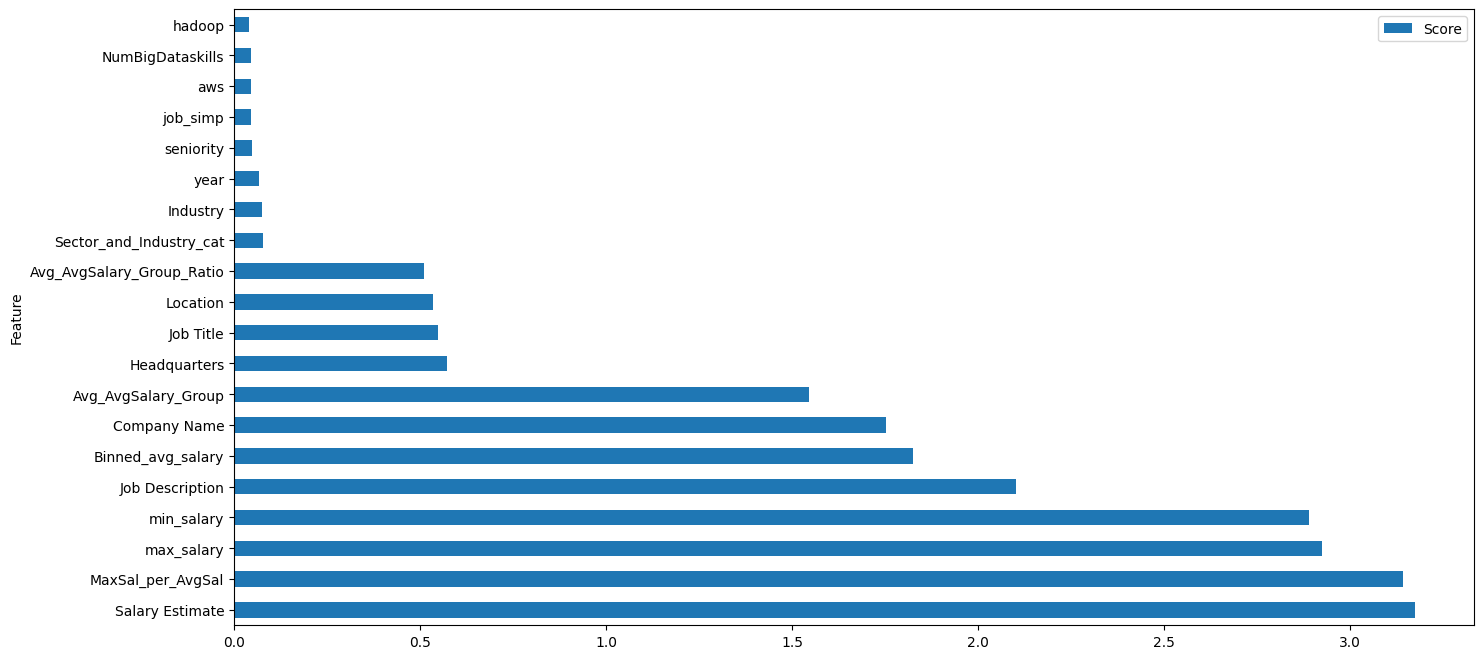

In [110]:
# plot values
feature_scores[0:20].plot(x='Feature',y='Score',kind='barh',figsize=(16,8))

The features with highest score have shown in the plot. It is obvious that why some of them have high mutual information with avg_salary ( max/min salary, salary estimate, ...) but there are other features that have also high mutual data with target column that are helpful for us.

# Dimensonality reduction using PCA

Applying Mutual Information technique to high dimensional data is time-consuming! Due to this in the purpose of high dimensional data, we will use dimension reduction methods like PCA.

It is better to normalize our data before PCA.

In [111]:
# At first we should normalize data - necessary!
normalized_df = StandardScaler().fit_transform(df)

In [112]:
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(normalized_df)
df_pca = pd.DataFrame(data = normalized_df)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.738202,-1.45439,-1.622559,-0.671679,-1.460569,-1.018686,-1.196000,-1.475710,-1.635923,-1.160462,...,1.336899,-1.523073,-1.119035,0.361934,-0.791198,-0.696255,-0.470883,0.173798,-0.531886,0.873068
1,-0.717196,-1.45439,-1.615182,0.487259,-1.452363,-1.001232,-1.180795,-1.002092,-1.007589,-1.070279,...,1.336899,-1.031164,0.956737,0.361934,1.263906,1.302828,-0.045803,-0.329047,0.474961,1.703208
2,-0.717196,-1.45439,-1.607806,0.065827,-1.444157,-0.983778,-1.165590,-1.475710,-0.379255,-0.980096,...,1.336899,-0.047345,-1.415574,0.361934,-0.791198,-0.696255,-0.470883,-0.134397,0.189854,1.356423
3,-0.717196,-1.45439,-1.600430,-0.250247,-1.435951,-0.966324,-1.150385,-0.528474,-1.007589,-0.889913,...,0.438303,-0.539255,-0.525957,0.361934,-0.791198,-0.696255,-0.027967,0.968619,-0.229875,-0.098269
4,-0.717196,-1.45439,-1.593054,-0.882395,-1.427745,-1.018686,-1.196000,-0.054856,0.249078,-0.799730,...,0.438303,-0.539255,-1.193170,0.361934,-0.791198,-0.696255,0.694526,0.773969,-0.967368,0.109874


Text(0.5, 1.0, ' ')

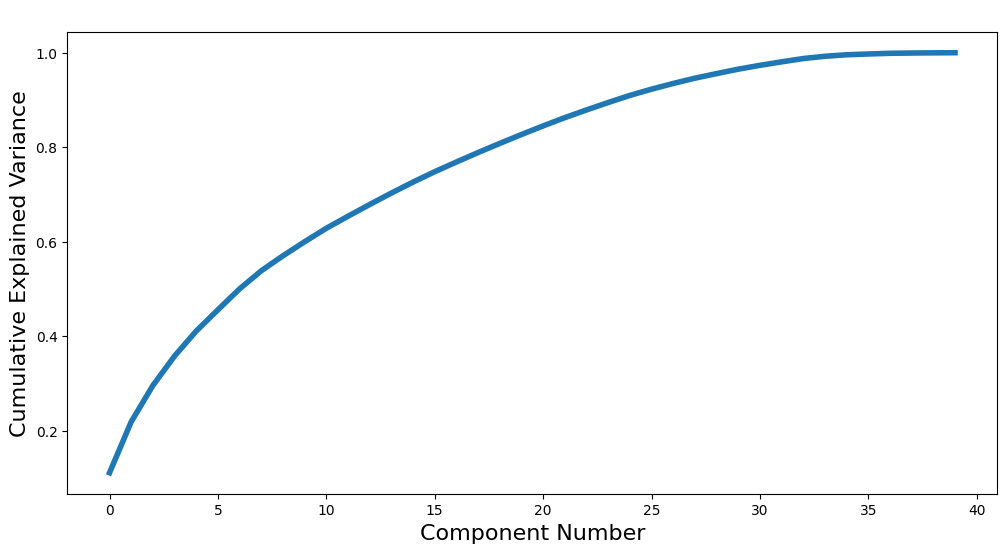

In [113]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)
plt.xlabel('Component Number',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title(' ')


In some point, we observe a convergence to 1 although we increase components. This is the point that we should stop increasing components number.

# When is feature engineering a “**nice to have option**” and in what situations it is a “**must to have**”?

## Must to have

Feature engineering is a must to have option when:


*   **Raw data**: Most ML algorithms need data in certain format and could not work with any type of data. For example, when we have categorical data, we should convert it to numerical values.

*   **Noisy data**: Noisy data do not represent features correctly. With help of feature engineering, we can extract useful features.

*   **Insufficient Data**: In cases where the available data is limited, feature engineering becomes essential. Creating relevant features can provide the model with additional information to learn from, making the most out of the available data.

*   **Domain Knowledge**: When domain expertise is available, feature engineering can leverage this knowledge to create meaningful features. Domain-specific features can significantly enhance a model’s performance.

*   **Complex Relationships**: When the relationship between features cannot be captured by simple linear functions, feature engineering becomes crucial. Polynomial or derived features are two instances of complex features.



## Nice to have option

feature engineering is a "nice-to-have" option when:


*   **Plenty of Data**: When you have massive amount of high-quality data, ML models can usually perform well without intricate feature engineering. Large datasets give this opportunity to model to discover patterns directly from data.

*   **Limited Time/Resource**: Feature engineering is usually a time-consuming process. When we have limited time to develop our model, feature engineering is not a priority.

* **Performance is promising!**: When we could achieve acceptable results without feature engineering, it won't be necessary to do it.

